### The components of a web page

When we visit a web page, our web browser makes a request to a web server. This request is called a `GET` request, since we're getting files from the server. The server then sends back files that tell our browser how to render the page for us. The files fall into a few main types:
* HTML — contain the main content of the page.
* CSS — add styling to make the page look nicer.
* JS — Javascript files add interactivity to web pages.
* Images — image formats, such as JPG and PNG allow web pages to show pictures.

### HTML
#### 1. Introduction
HTML a markup language that tells a browser how to layout content. HTML allows you to do similar things to what you do in a word processor like Microsoft Word — make text bold, create paragraphs, and so on. 

HTML consists of elements called tags. The most basic tag is the `<html>` tag. This tag tells the web browser that everything inside of it is HTML. 

```html
<html>
    <head>
    </head>
    <body>
        <p>
            Here's a paragraph of text!
        </p>
        <p>
            Here's a second paragraph of text!
        </p>
    </body>
</html>
```
#### Here's how this will look:
<kbd>
<html>
    <head>
    </head>
    <body>
        <p>
            Here's a paragraph of text!
        </p>
        <p>
            Here's a second paragraph of text!
        </p>
    </body>
</html>
</kbd>


Tags have commonly used names that depend on their position in relation to other tags:

* `child` — a child is a tag inside another tag. So the two `p` tags above are both children of the `body` tag.
* `parent` — a parent is the tag that another tag is inside. e.g. the `html` tag is the parent of the `body` tag.
* `sibiling` — a sibiling is a tag that inside the same parent as another tag. e.g., `head` and `body` are siblings, since they're both inside `html`. 


#### 2.HTML hyperlink
```html
<html>
    <head>
    </head>
    <body>
        <p>
            Here's a paragraph of text!
            <a href="https://www.dataquest.io">Learn Data Science Online</a>
        </p>
        <p>
            Here's a second paragraph of text!
            <a href="https://www.python.org">Python</a>
        </p>
    </body>
</html>
```
Output:
<kbd>
<html>
    <head>
    </head>
    <body>
        <p>
            Here's a paragraph of text!
            <a href="https://www.dataquest.io">Learn Data Science Online</a>
        </p>
        <p>
            Here's a second paragraph of text!
            <a href="https://www.python.org">Python</a>
        </p>
    </body>
</html>
</kbd>
<br \>
In which, <br \>
`a` tag are links, tell the browser to render a link to another web page. <br \>
The `href` property of the tag determines where the link goes.<br \><br \>
There are some more tags:
* `div` — indicates a division, or area, of the page.
* `b` — bolds any text inside.
* `i` — italicizes any text inside.
* `table` — creates a table.
* `form` — creates an input form.

#### 3.HTML classes

One element can have multiple classes, and a class can be shared between elements. Each element can only have one id, and an id can only be used once on a page. Classes and ids are optional, and not all elements will have them.

```html
<html>
    <head>
    </head>
    <body>
        <p class="bold-paragraph">
            Here's a paragraph of text!
            <a href="https://www.dataquest.io" id="learn-link">Learn Data Science Online</a>
        </p>
        <p class="bold-paragraph extra-large">
            Here's a second paragraph of text!
            <a href="https://www.python.org" class="extra-large">Python</a>
        </p>
    </body>
</html>
```
Output:
<kbd>
<html>
    <head>
    </head>
    <body>
        <p class="bold-paragraph">
            Here's a paragraph of text!
            <a href="https://www.dataquest.io" id="learn-link">Learn Data Science Online</a>
        </p>
        <p class="bold-paragraph extra-large">
            Here's a second paragraph of text!
            <a href="https://www.python.org" class="extra-large">Python</a>
        </p>
    </body>
</html>
</kbd>

### Request
The first thing we'll need to do to scrape a web page is to download the page. We can download pages using the Python requests library. The requests library will make a `GET` request to a web server, which will download the `HTML` contents of a given web page for us. 

In [1]:
import requests
page = requests.get('http://dataquestio.github.io/web-scraping-pages/simple.html')
page

#Status code starting with a 2 generally indicates success, 
# and a code starting with a 4 or a 5 indicates an error.

<Response [200]>

In [2]:
page.content  #content of the downloaded html

b'<!DOCTYPE html>\n<html>\n    <head>\n        <title>A simple example page</title>\n    </head>\n    <body>\n        <p>Here is some simple content for this page.</p>\n    </body>\n</html>'

### BeautifulSoup
html parsing tool.

In [3]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(page.content,'html.parser')
soup

<!DOCTYPE html>

<html>
<head>
<title>A simple example page</title>
</head>
<body>
<p>Here is some simple content for this page.</p>
</body>
</html>

In [4]:
# format - nested
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   A simple example page
  </title>
 </head>
 <body>
  <p>
   Here is some simple content for this page.
  </p>
 </body>
</html>


In [5]:
# list all the elements at the top level of the page
list(soup.children)
# 

['html', '\n', <html>
 <head>
 <title>A simple example page</title>
 </head>
 <body>
 <p>Here is some simple content for this page.</p>
 </body>
 </html>]

In [6]:
[type(item) for item in list(soup.children)]

[bs4.element.Doctype, bs4.element.NavigableString, bs4.element.Tag]

All of the items are `BeautifulSoup` objects:
1. `Doctype` contains information about the type of the document
2. `NavigableString` represent text found in the HTML document
3. `Tag` contains nested tags.

In [9]:
# select html items from soup's children:
html = list(soup.children)[2]
html

<html>
<head>
<title>A simple example page</title>
</head>
<body>
<p>Here is some simple content for this page.</p>
</body>
</html>

In [11]:
# select body items from html's children
body =  list(html.children)[3]
body

<body>
<p>Here is some simple content for this page.</p>
</body>

In [17]:
# select p items from body's children
p = list(body.children)[1]
print(p.get_text())

Here is some simple content for this page.


In [18]:
# Finding all instance of a tag at once, instead of parsing layer by layer
soup = BeautifulSoup(page.content,'html.parser')
soup.find_all('p')

[<p>Here is some simple content for this page.</p>]

In [19]:
soup.find_all('p')[0].get_text()

'Here is some simple content for this page.'

### Searching for tags by class and id

Classes and ids are used by CSS to determine which HTML elements to apply certain styles to. We can also use them when scraping to specify specific elements we want to scrape. To illustrate this principle, we'll work with the following page:

```html
<html>
    <head>
        <title>A simple example page</title>
    </head>
    <body>
        <div>
            <p class="inner-text first-item" id="first">
                First paragraph.
            </p>
            <p class="inner-text">
                Second paragraph.
            </p>
        </div>
        <p class="outer-text first-item" id="second">
            <b>
                First outer paragraph.
            </b>
        </p>
        <p class="outer-text">
            <b>
                Second outer paragraph.
            </b>
        </p>
    </body>
</html>
```
Output:
<kbd>
<html>
    <head>
        <title>A simple example page</title>
    </head>
    <body>
        <div>
            <p class="inner-text first-item" id="first">
                First paragraph.
            </p>
            <p class="inner-text">
                Second paragraph.
            </p>
        </div>
        <p class="outer-text first-item" id="second">
            <b>
                First outer paragraph.
            </b>
        </p>
        <p class="outer-text">
            <b>
                Second outer paragraph.
            </b>
        </p>
    </body>
</html>
</kbd>

In [22]:
page = requests.get("http://dataquestio.github.io/web-scraping-pages/ids_and_classes.html")
soup = BeautifulSoup(page.content, 'html.parser')
# search outer-text，using class name
soup.find_all('p', class_='outer-text')

[<p class="outer-text first-item" id="second">
 <b>
                 First outer paragraph.
             </b>
 </p>, <p class="outer-text">
 <b>
                 Second outer paragraph.
             </b>
 </p>]

In [23]:
# search according to the id
soup.find_all(id="first")

[<p class="inner-text first-item" id="first">
                 First paragraph.
             </p>]

### searching according to the CSS selectors
CSS language selectors allows developers to specify HTML tags to style

* `p a` — finds all `a` tags inside of a `p` tag.
* `body p a` — finds all `a` tags inside of a `p` tag inside of a `body` tag.
* `html body` — finds all `body` tags inside of an `html` tag.
* `p.outer-text` — finds all `p` tags with a class of `outer-text`.
* `p#first` — finds all `p` tags with an id of `first`.
* `body p.outer-text` — finds any `p` tags with a class of `outer-text` inside of a `body` tag.

In [24]:
# select p inside of div
soup.select("div p")

[<p class="inner-text first-item" id="first">
                 First paragraph.
             </p>, <p class="inner-text">
                 Second paragraph.
             </p>]

## Case study
extract weather data from from the National Weather Service website. （https://www.weather.gov), inspect elements of the web site。 In this case, it's a `div` tag with the id `seven-day-forecast`:
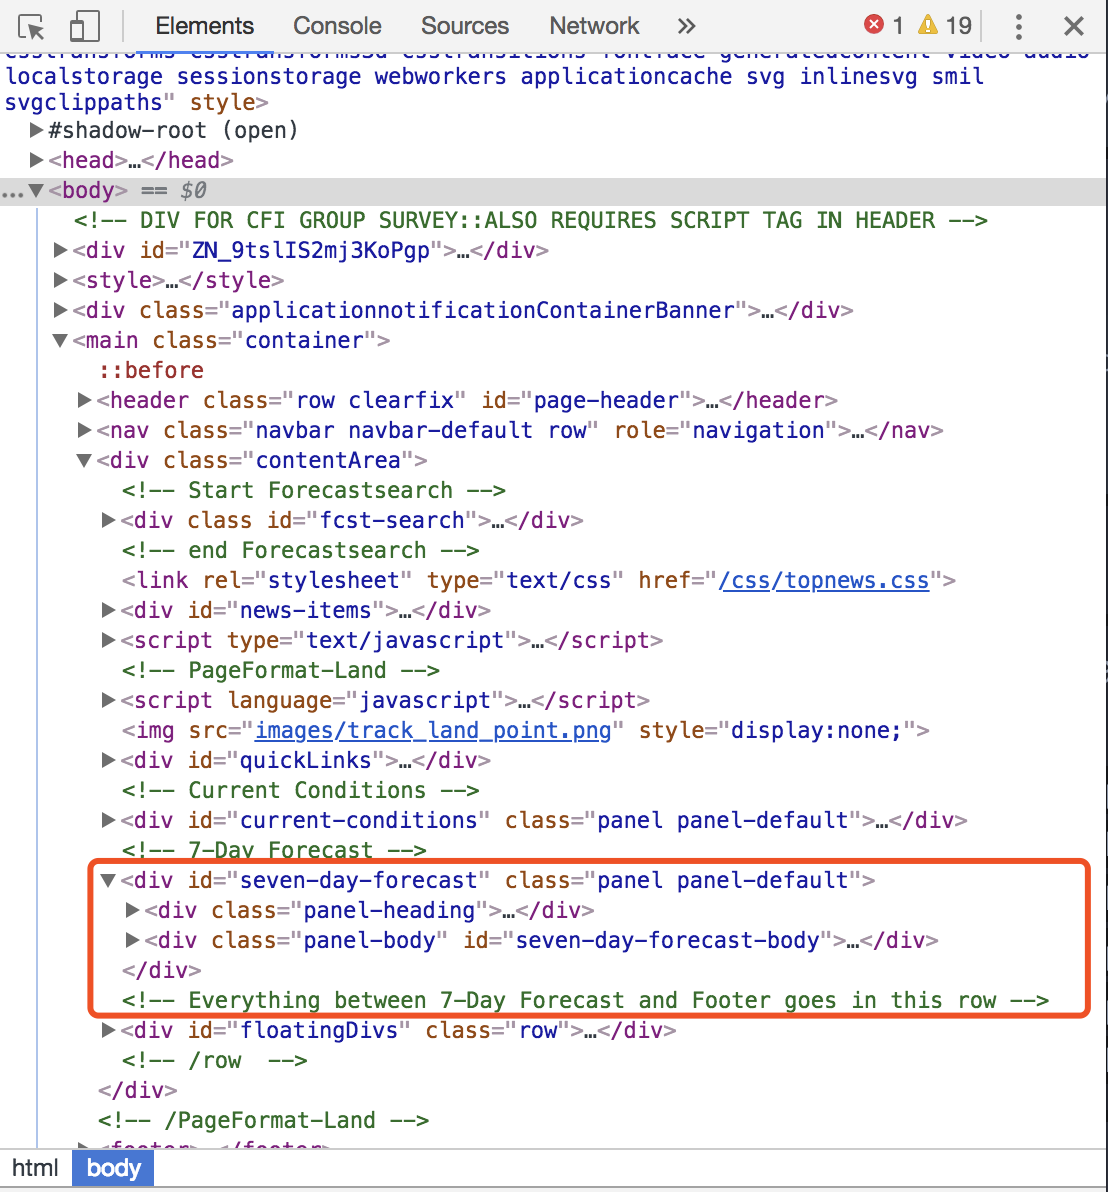

<br \>
If you click around on the console, and explore the div, you'll discover that each forecast item (like "Tonight", "Thursday", and "Thursday Night") is contained in a div with the class `tombstone-container`.
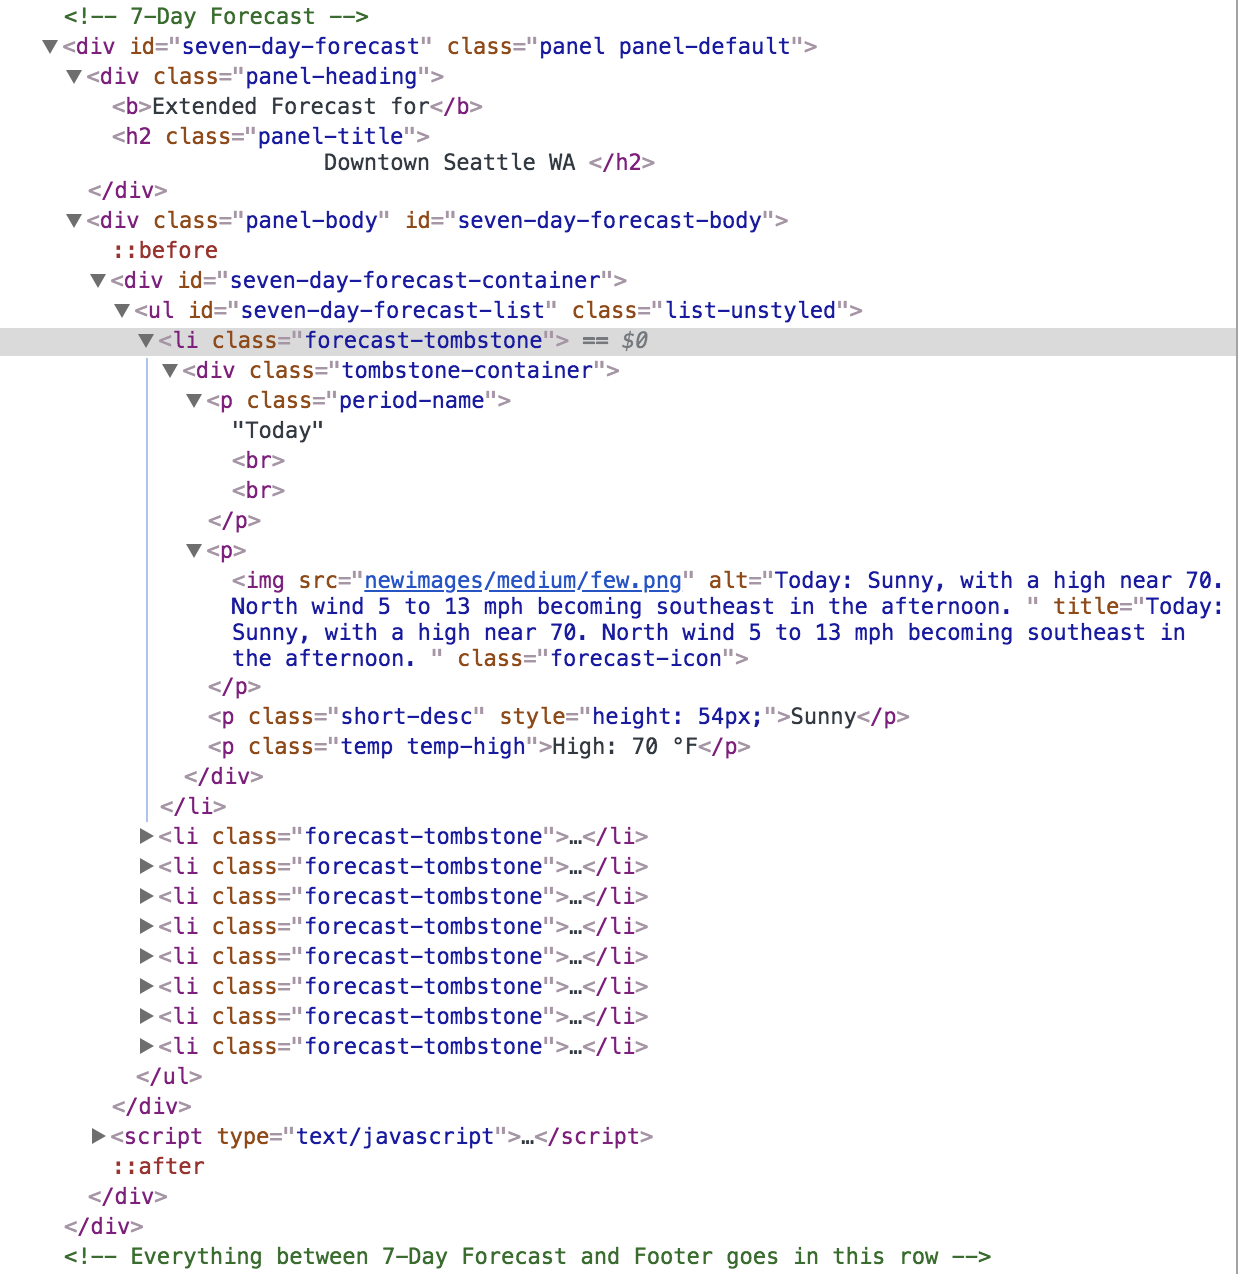
<br \><br \>

parsing the Page:
* Download the web page cotaining the forecast
* Create a `BeautifulSoup` class the parse the page.
* Find the `div` with id `seven-day-forecast`, and assign to `seven_day`
* Inside `seven_day`, find each individual forecast item.
* Extract and print the first forecast item.


In [1]:
import requests
from bs4 import BeautifulSoup
url = 'https://forecast.weather.gov/MapClick.php?lat=47.60357000000005&lon=-122.32944999999995#.WqacHmacZdA'
page = requests.get(url)
soup = BeautifulSoup(page.content,'html.parser')
seven_day = soup.find(id="seven-day-forecast")
forecast_items = seven_day.find_all(class_="tombstone-container")
tonight = forecast_items[0]
print(tonight.prettify())

<div class="tombstone-container">
 <p class="period-name">
  Tonight
  <br/>
  <br/>
 </p>
 <p>
  <img alt="Tonight: Increasing clouds, with a low around 50. East southeast wind 12 to 17 mph decreasing to 5 to 10 mph after midnight. Winds could gust as high as 23 mph. " class="forecast-icon" src="newimages/medium/nbkn.png" title="Tonight: Increasing clouds, with a low around 50. East southeast wind 12 to 17 mph decreasing to 5 to 10 mph after midnight. Winds could gust as high as 23 mph. "/>
 </p>
 <p class="short-desc">
  Increasing
  <br/>
  Clouds
 </p>
 <p class="temp temp-low">
  Low: 50 °F
 </p>
</div>


### Further extraction:
Analysis: inside the forcast item `tonight` is all the information we want.There are 4 pieces of information we can extract:
* The name of the period-name forecast item - `tonight` 
* The description of the conditions — properties of `img`.
* A short description of the conditions — in this case, `Clouds`.
* Temperature low - 50 degrees

In [2]:
#further extraction:
period = tonight.find(class_="period-name").get_text()
short_desc = tonight.find(class_="short-desc").get_text()
temp = tonight.find(class_="temp").get_text()

print(period)
print(short_desc)
print(temp)

Tonight
IncreasingClouds
Low: 50 °F


In [3]:
img = tonight.find('img')
desc = img['title']
print(desc)

Tonight: Increasing clouds, with a low around 50. East southeast wind 12 to 17 mph decreasing to 5 to 10 mph after midnight. Winds could gust as high as 23 mph. 


### extract all the information from the page
* Select all items with the class `period-name` inside an item with the class `tombstone-container` in `seven_day`
* Use a list comprehension to call the `get_text` method on each `BeautifulSoup` object.

In [5]:
period_tags = seven_day.select(".tombstone-container .period-name")
periods = [pt.get_text() for pt in period_tags]
periods

['Tonight',
 'Tuesday',
 'TuesdayNight',
 'Wednesday',
 'WednesdayNight',
 'Thursday',
 'ThursdayNight',
 'Friday',
 'FridayNight']

In [6]:
short_descs = [sd.get_text() for sd in seven_day.select(".tombstone-container .short-desc")]
temps = [t.get_text() for t in seven_day.select(".tombstone-container .temp")]
descs = [d["title"] for d in seven_day.select(".tombstone-container img")]

print(short_descs)
print(temps)
print(descs)

['IncreasingClouds', 'Rain andBreezy', 'Rain andBreezy', 'ShowersLikely', 'ChanceShowers', 'ChanceShowers', 'Slight ChanceShowers', 'Slight ChanceShowers', 'Slight ChanceShowers']
['Low: 50 °F', 'High: 55 °F', 'Low: 40 °F', 'High: 51 °F', 'Low: 38 °F', 'High: 53 °F', 'Low: 37 °F', 'High: 54 °F', 'Low: 40 °F']
['Tonight: Increasing clouds, with a low around 50. East southeast wind 12 to 17 mph decreasing to 5 to 10 mph after midnight. Winds could gust as high as 23 mph. ', 'Tuesday: Rain, mainly after 11am.  High near 55. Breezy, with an east southeast wind 10 to 15 mph becoming south 17 to 22 mph in the morning. Winds could gust as high as 29 mph.  Chance of precipitation is 80%. New precipitation amounts between a tenth and quarter of an inch possible. ', 'Tuesday Night: Rain.  Low around 40. Breezy, with a west southwest wind 18 to 23 mph becoming west southwest 8 to 13 mph in the evening. Winds could gust as high as 30 mph.  Chance of precipitation is 80%. New precipitation amounts 

In [7]:
# save the data to the pandas dataframe

import pandas as pd
weather = pd.DataFrame({
        "period": periods, 
        "short_desc": short_descs, 
        "temp": temps, 
        "desc":descs
    })
weather

,desc,period,short_desc,temp
0,"Tonight: Increasing clouds, with a low around ...",Tonight,IncreasingClouds,Low: 50 °F
1,"Tuesday: Rain, mainly after 11am. High near 5...",Tuesday,Rain andBreezy,High: 55 °F
2,"Tuesday Night: Rain. Low around 40. Breezy, w...",TuesdayNight,Rain andBreezy,Low: 40 °F
3,"Wednesday: Showers likely. Mostly cloudy, wit...",Wednesday,ShowersLikely,High: 51 °F
4,Wednesday Night: A 30 percent chance of shower...,WednesdayNight,ChanceShowers,Low: 38 °F
5,Thursday: A 30 percent chance of showers. Mos...,Thursday,ChanceShowers,High: 53 °F
6,Thursday Night: A 20 percent chance of showers...,ThursdayNight,Slight ChanceShowers,Low: 37 °F
7,Friday: A slight chance of showers. Partly su...,Friday,Slight ChanceShowers,High: 54 °F
8,Friday Night: A slight chance of showers. Mos...,FridayNight,Slight ChanceShowers,Low: 40 °F


In [8]:
# Data cleaning
temp_nums = weather["temp"].str.extract("(?P<temp_num>\d+)", expand=False)
weather["temp_num"] = temp_nums.astype('int')
temp_nums

0    50
1    55
2    40
3    51
4    38
5    53
6    37
7    54
8    40
Name: temp_num, dtype: object

In [9]:
# Data filter
is_night = weather["temp"].str.contains("Low")
weather["is_night"] = is_night
is_night

0     True
1    False
2     True
3    False
4     True
5    False
6     True
7    False
8     True
Name: temp, dtype: bool

In [10]:
weather[is_night]

,desc,period,short_desc,temp,temp_num,is_night
0,"Tonight: Increasing clouds, with a low around ...",Tonight,IncreasingClouds,Low: 50 °F,50,True
2,"Tuesday Night: Rain. Low around 40. Breezy, w...",TuesdayNight,Rain andBreezy,Low: 40 °F,40,True
4,Wednesday Night: A 30 percent chance of shower...,WednesdayNight,ChanceShowers,Low: 38 °F,38,True
6,Thursday Night: A 20 percent chance of showers...,ThursdayNight,Slight ChanceShowers,Low: 37 °F,37,True
8,Friday Night: A slight chance of showers. Mos...,FridayNight,Slight ChanceShowers,Low: 40 °F,40,True
